In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_data = pd.read_csv('cleaned_data.csv')
model_data

,price,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,...,has_internet,has_security_door,has_video_surveillance,has_storage,has_first_rent,has_deposit,has_commission,has_contract_fee,description_header_is_all_caps,description_header_length
0,750.0,2.0,42.1,1807.0,4.0,NaN,NaN,NaN,1.0,3.0,...,True,True,False,False,False,False,False,False,True,30.0
1,595.0,3.0,58.7,2005.0,3.0,NaN,2.0,NaN,3.0,5.0,...,True,True,False,False,True,True,True,False,False,40.0
2,670.0,2.0,72.0,NaN,4.0,NaN,1.0,NaN,4.0,4.0,...,True,True,False,True,False,False,False,False,False,0.0
3,550.0,1.0,24.0,2023.0,5.0,7.0,1.0,550.0,3.0,4.0,...,False,False,False,True,False,False,False,False,False,47.0
4,800.0,2.0,48.1,2020.0,3.0,NaN,1.0,NaN,1.0,4.0,...,False,False,False,False,True,True,False,True,True,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,540.0,2.0,41.9,2018.0,5.0,NaN,1.0,NaN,1.0,1.0,...,True,False,False,False,True,True,False,False,False,0.0
1866,790.0,2.0,45.8,2022.0,5.0,7.0,1.0,NaN,2.0,4.0,...,False,True,False,True,True,True,True,False,True,41.0
1867,459.0,1.0,21.0,2019.0,5.0,NaN,NaN,NaN,6.0,8.0,...,True,True,True,True,False,True,False,False,False,50.0
1868,500.0,1.0,32.9,1994.0,5.0,4.0,1.0,500.0,7.0,9.0,...,True,True,True,False,False,True,True,False,True,38.0


In [2]:
import seaborn as sns

model_data = pd.get_dummies(model_data, columns=['mun_or_city']) 
X = model_data.drop(columns=['price'])
y = model_data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

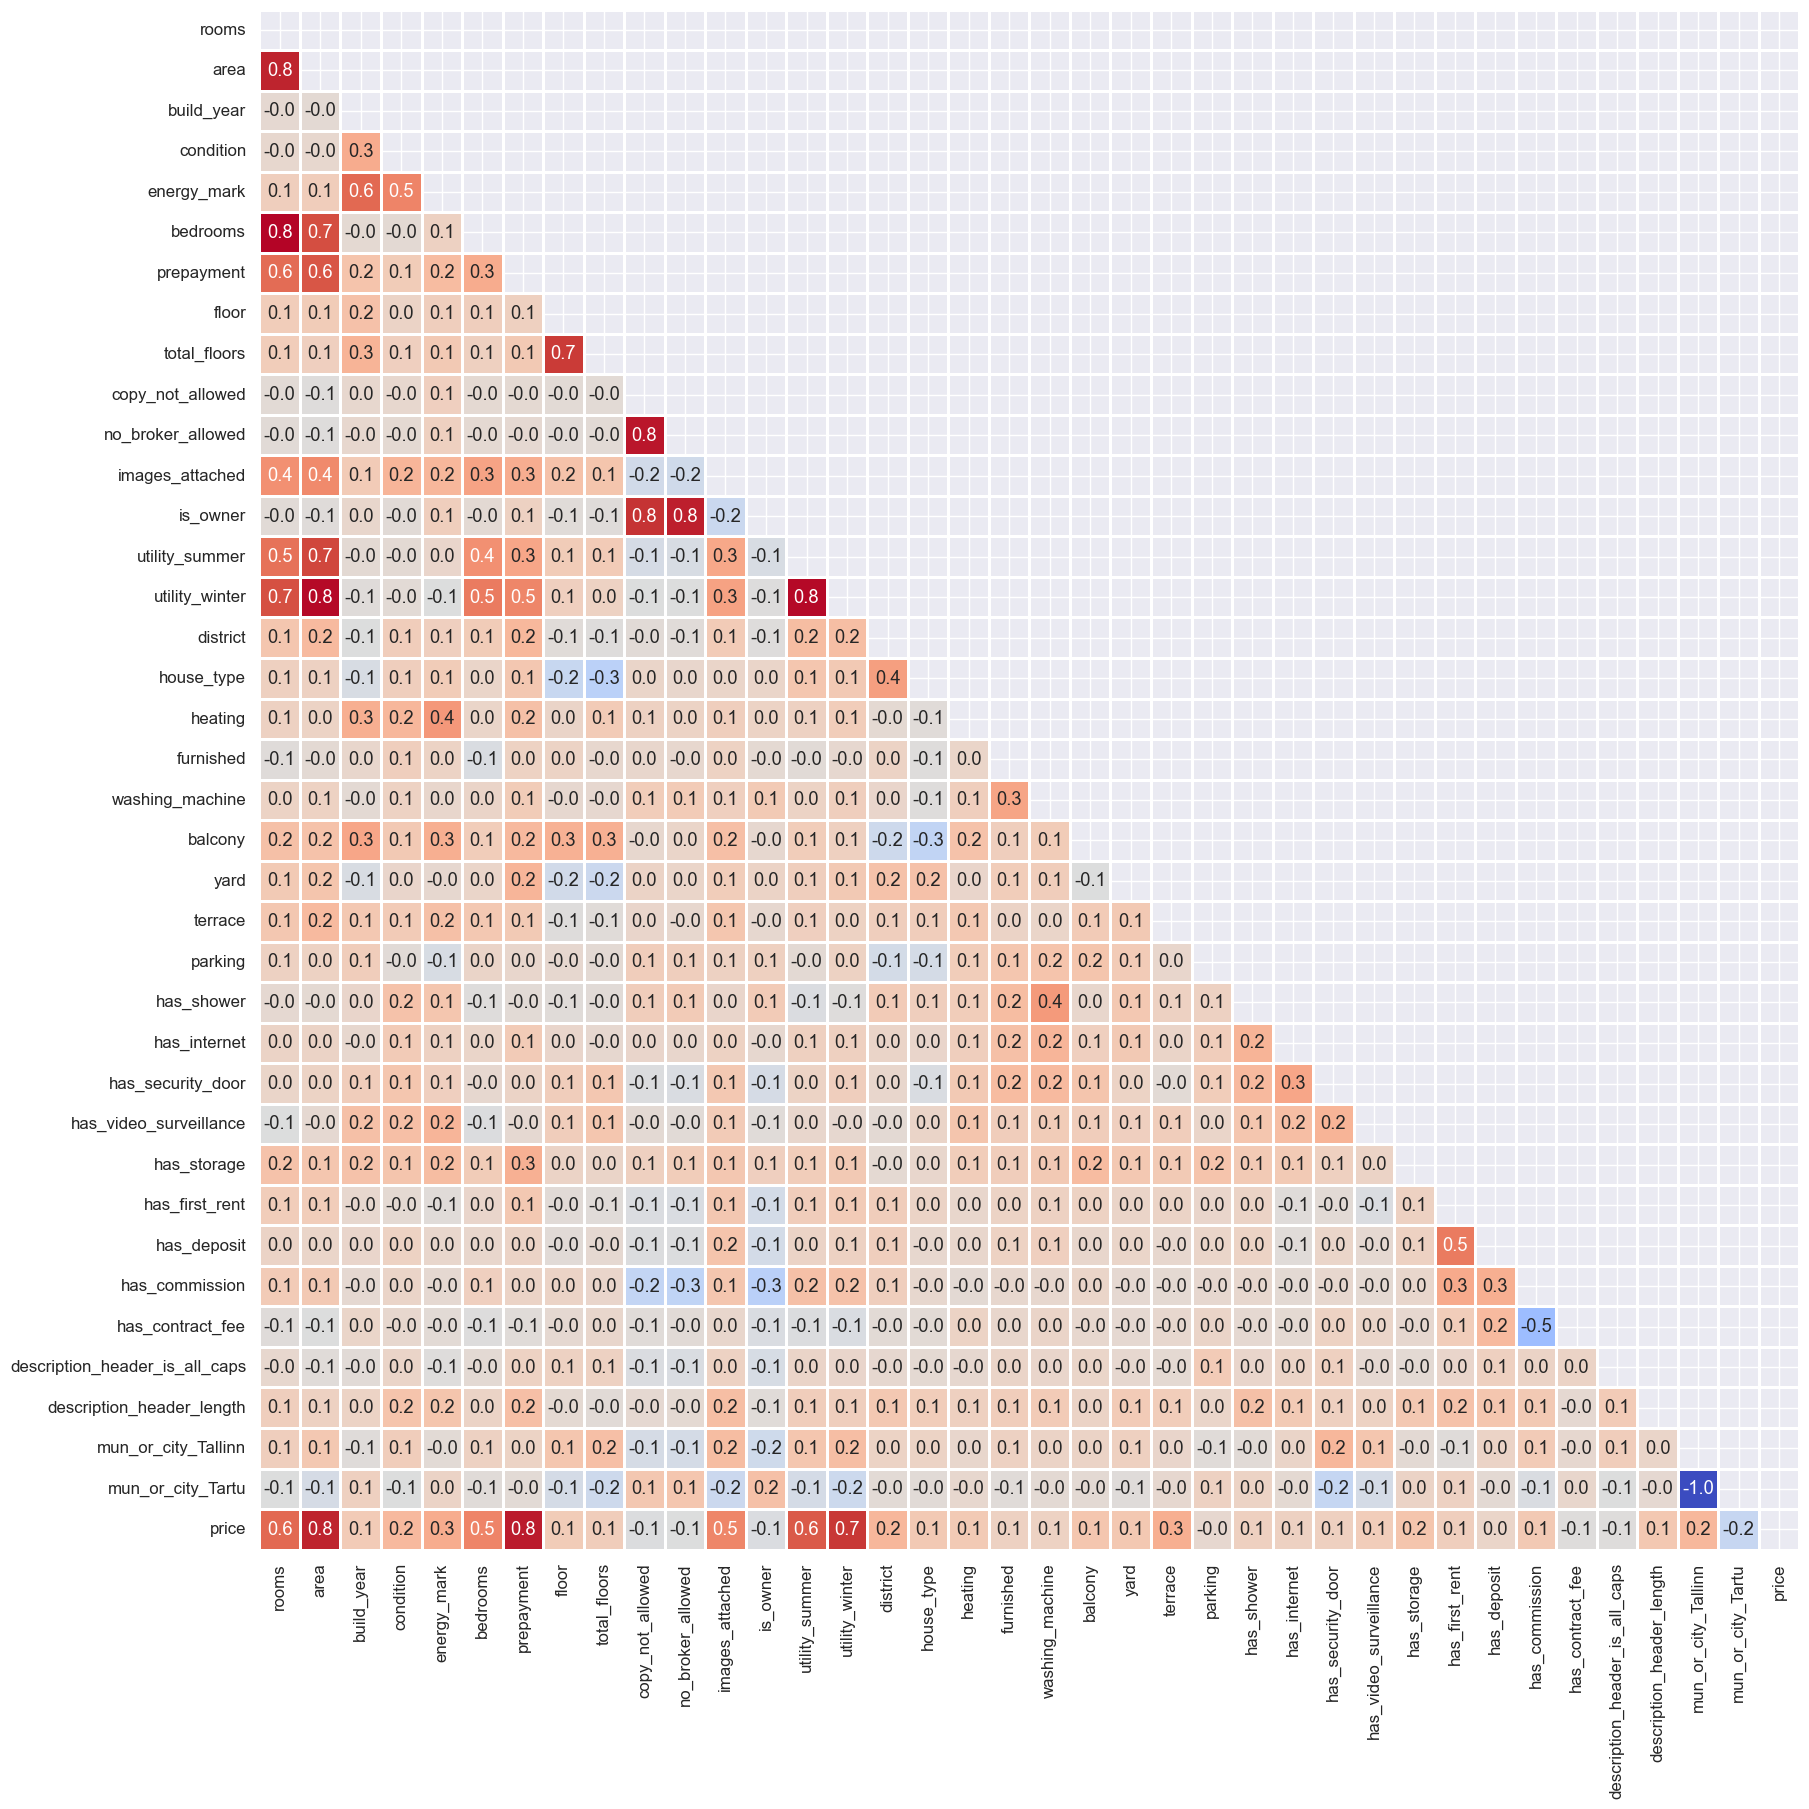

In [3]:
sns.set(font_scale=1.1)
columns = [col for col in model_data.columns if col != 'price'] + ['price']
model_data = model_data[columns]
correlation_train = model_data.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

In [4]:
X_train.describe()

,rooms,area,build_year,condition,energy_mark,bedrooms,prepayment,floor,total_floors,images_attached,utility_summer,utility_winter,district,house_type,heating,description_header_length
count,1397.000000,1402.000000,1104.000000,1284.000000,709.000000,1003.000000,257.000000,1305.000000,1305.000000,1401.000000,464.000000,464.000000,1402.000000,1055.000000,1196.000000,1402.000000
mean,2.075161,50.924679,1983.473732,3.713396,5.595205,1.455633,529.267315,3.170881,5.165517,19.729479,92.452586,170.743534,3.487874,1.806635,7.169732,34.315264
std,0.890538,27.523834,45.653085,0.971347,1.547197,0.673697,182.740318,2.212779,3.051482,9.689998,49.285192,96.050568,1.611498,0.438379,1.646740,16.746006
min,1.000000,8.500000,1347.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,2.000000,17.000000,17.000000,1.000000,1.000000,2.000000,0.000000
25%,1.000000,33.000000,1961.750000,3.000000,4.000000,1.000000,400.000000,2.000000,3.000000,13.000000,60.000000,110.000000,2.000000,2.000000,7.000000,26.000000
50%,2.000000,46.900000,1989.000000,4.000000,6.000000,1.000000,500.000000,3.000000,5.000000,18.000000,80.000000,150.000000,4.000000,2.000000,7.000000,39.000000
75%,3.000000,61.600000,2018.000000,5.000000,7.000000,2.000000,650.000000,4.000000,6.000000,25.000000,110.000000,200.000000,5.000000,2.000000,9.000000,47.000000
max,6.000000,265.000000,2024.000000,5.000000,8.000000,5.000000,990.000000,24.000000,30.000000,68.000000,500.000000,1000.000000,5.000000,3.000000,11.000000,64.000000


In [5]:
# not a perfect solution, but let's fill all possible NaN-values with mean values (after splitting, of course!)
columns = ['rooms', 'build_year', 'condition', 'energy_mark', 'bedrooms', 'prepayment', 'floor', 'total_floors',
           'utility_summer', 'utility_winter', 'house_type', 'heating']
# images attached replace with 0
for column in columns:
    X_train[column] = X_train[column].fillna(X_train[column].mean())
    X_test[column] = X_test[column].fillna(X_test[column].mean())

# if images attached is NaN, it's probably 0
X_train.images_attached = X_train.images_attached.fillna(0)
X_test.images_attached = X_test.images_attached.fillna(0)

# if it's NaN, it probably doesn't exist, therefore isn't in caps
X_train.description_header_is_all_caps = X_train.images_attached.fillna(False)
X_test.description_header_is_all_caps = X_test.images_attached.fillna(False)

In [6]:
X_train.isna().sum()

rooms                             0
area                              0
build_year                        0
condition                         0
energy_mark                       0
bedrooms                          0
prepayment                        0
floor                             0
total_floors                      0
copy_not_allowed                  0
no_broker_allowed                 0
images_attached                   0
is_owner                          0
utility_summer                    0
utility_winter                    0
district                          0
house_type                        0
heating                           0
furnished                         0
washing_machine                   0
balcony                           0
yard                              0
terrace                           0
parking                           0
has_shower                        0
has_internet                      0
has_security_door                 0
has_video_surveillance      

In [7]:
!pip install scikit-optimize


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import skopt
from skopt import BayesSearchCV

model_lasso = Lasso(alpha=0.5)  
#LASSO = least absolute shrinkage and selection operation
#performs both variable selection and regularization to enhance the prediction accuracy and interpretability
#because we have some very weak correlatins with price. Lasso regression helps by forcing some coefficients to exactly zero if htey don't contribute much to the model
#after fitting features with non-zero coefficents in Lasso are the most relevant for prediciting price

model_lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Lasso Regression - Mean Squared Error: {mse}")
print(f"Lasso Regression - Root Mean Square Error (RMSE): {rmse}")
##Linear Regression
#this is used as a baseline model to understand the basic relationships 
#provides coeffcients that directly indicate the impact of each feature on the target vairable. 
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - Root Mean Square Error (RMSE): {rmse}")

#Ridge Regression

#RandomForestRegression
#does not assume a linear relationship between featues and the target variable. 
#like if cobined influence of rooms area on price may be non-linear adn significant
#resitant to outliers (the ones with less impact)
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RandomForestTree Reg - Mean Squared Error: {mse}")
print(f"RandomForestTree Reg - Root Mean Square Error (RMSE): {rmse}")

#Optimized ForestTree

#param_grid = {
 #   'n_estimators': [100, 200, 300],
  #  'max_depth': [None, 10, 20, 30],
   # 'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

#rf = RandomForestRegressor(random_state=42)
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

#best_rf = grid_search.best_estimator_
#y_pred = best_rf.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)

print(f"Optimized RandomForest - Mean Squared Error: {mse}")
print(f"Optimized RandomForest - Root Mean Square Error (RMSE): {rmse}")

#SVR 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
#epsilon - allows SVR to tolerate a small margin of error
#rbf - radial basis function - also can interact in non-linear ways
#because we dont have such a huge dataset this is good use
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - Root Mean Square Error (RMSE): {rmse_svr}")

#GBM
#combines multiple decision trees in a sequiential manner. Each tree corrects the error of the previous ones,
#allowing the model to learn complex, non-linear relationships between features and the target variables. 
#this provides also feature importance scores. 
gbm = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)
#n-estiamtors - how many trees
#learning rate - determines the controbution of each tree to the final prediction
# max depth - limits the depth of each tree
#random state - ensures reproducibility
gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)

print(f"GBM - Mean Squared Error: {mse_gbm}")
print(f"GBM - Root Mean Square Error (RMSE): {rmse_gbm}")

#OPTIMIZED GBM

#param_grid = {
 #   'n_estimators': [100, 200, 300, 400],
  ## 'max_depth': [3, 4, 5, 6],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

#gbm = GradientBoostingRegressor(random_state=42)
#grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

#best_gbm = grid_search.best_estimator_
#y_pred = best_gbm.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)

#print(f"Optimized GBM - Mean Squared Error: {mse}")
#print(f"Optimized GBM - Root Mean Square Error (RMSE): {rmse}")



param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#grid search automates the process by iterating through all possible combinations of the hyperparamters that i assigned

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_gbm = grid_search.best_estimator_
y_pred = best_gbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Optimized GBM with Grid Search - Mean Squared Error: {mse}")
print(f"Optimized GBM with Grid Search - Root Mean Square Error (RMSE): {rmse}")

Lasso Regression - Mean Squared Error: 89894.1517596693
Lasso Regression - Root Mean Square Error (RMSE): 299.82353436591546
Linear Regression - Mean Squared Error: 89969.26666128202
Linear Regression - Root Mean Square Error (RMSE): 299.94877339519496
RandomForestTree Reg - Mean Squared Error: 74821.87007765115
RandomForestTree Reg - Root Mean Square Error (RMSE): 273.53586616319836
Optimized RandomForest - Mean Squared Error: 74821.87007765115
Optimized RandomForest - Root Mean Square Error (RMSE): 273.53586616319836
SVR - Mean Squared Error: 291113.33063120005
SVR - Root Mean Square Error (RMSE): 539.5491920401698
GBM - Mean Squared Error: 71806.57533642164
GBM - Root Mean Square Error (RMSE): 267.967489327384
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Optimized GBM with Grid Search - Mean Squared Error: 84723.69572026333
Optimized GBM with Grid Search - Root Mean Square Error (RMSE): 291.0733510994494


In [9]:

#this ran for over an hour so I used the best that i got from here to do 10 runs with the best attributes to get the average RMSE
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


param_grids = {
#määran palju erinevaid parameetreid millega proovida, et saada teada millega saab parima tulemuse
    "Lasso": {'alpha': [0.01, 0.1, 0.5, 1, 10]},
    "RandomForest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    },
    "SVR": {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
    "GBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    },
}

models = {
#katsetangi kohe mitme erineva mudeli peal
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "GBM": GradientBoostingRegressor(random_state=42),
}


#loeme kõik tulemused kokku
results = {}


for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(estimator=model, #what model
                               param_grid=param_grids[model_name], #assigns the hyperparameters
                               cv=5,  #4 parts for training 1 for validation
                               n_jobs=-1, #using all available CPU cores
                               verbose=2, #controls output
                               scoring='neg_mean_squared_error') #lower MSE = better
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[model_name] = {
        "Best Params": grid_search.best_params_,
        "MSE": mse,
        "RMSE": rmse
    }
    print(f"{model_name} - Best Params: {grid_search.best_params_}")
    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}\n")


for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Best Params: {metrics['Best Params']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  RMSE: {metrics['RMSE']}")
    print("\n")




Tuning Lasso...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Lasso - Best Params: {'alpha': 0.5}
Lasso - MSE: 89894.1517596693, RMSE: 299.82353436591546

Tuning RandomForest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
RandomForest - Best Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
RandomForest - MSE: 83160.43380697798, RMSE: 288.3755083341475

Tuning SVR...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVR - Best Params: {'C': 10, 'epsilon': 0.01}
SVR - MSE: 303264.38364968775, RMSE: 550.6944558007532

Tuning GBM...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
GBM - Best Params: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
GBM - MSE: 79884.46030548941, RMSE: 282.63839142177665

Lasso:
  Best Params: {'alpha': 0.5}
  MSE: 89894.1517596693
  RMSE: 299.82353436591546


RandomForest:
  Best Params: {'max_dept

In [10]:
#sain eelmiselt et selle parimad parameetrid on just need
best_gbm_params = {
    'learning_rate': 0.05,
    'max_depth': 4,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300,
    'random_state': 42
}
#empty lists to save the results we get
mse_list = []
rmse_list = []

#Teen 10 test runi et saada average väärtus
for i in range(10):
    print(f"Iteration {i+1}...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    #it has to split the data again, because if we use the same one over again we dont get the info we are looking for
    #splitting it differently in each iteration i am testing how the model performs across different training and testing splits.
    #but because we are splitting the data again to train and test the NaN values we have to replace:
    columns = ['rooms', 'build_year', 'condition', 'energy_mark', 'bedrooms', 'prepayment', 'floor', 'total_floors',
           'utility_summer', 'utility_winter', 'house_type', 'heating']
    # images attached replace with 0
    for column in columns:
        X_train[column] = X_train[column].fillna(X_train[column].mean())
        X_test[column] = X_test[column].fillna(X_test[column].mean())
    
    # if images attached is NaN, it's probably 0
    X_train.images_attached = X_train.images_attached.fillna(0)
    X_test.images_attached = X_test.images_attached.fillna(0)
    
    # if it's NaN, it probably doesn't exist, therefore isn't in caps
    X_train.description_header_is_all_caps = X_train.images_attached.fillna(False)
    X_test.description_header_is_all_caps = X_test.images_attached.fillna(False)
    model = GradientBoostingRegressor(**best_gbm_params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    mse_list.append(mse)
    rmse_list.append(rmse)

#average: 
avg_mse = np.mean(mse_list)
avg_rmse = np.mean(rmse_list)

print(f"Average GBM with Best Params - Mean Squared Error (MSE): {avg_mse}")
print(f"Average GBM with Best Params - Root Mean Squared Error (RMSE): {avg_rmse}")

Iteration 1...
Iteration 2...
Iteration 3...
Iteration 4...
Iteration 5...
Iteration 6...
Iteration 7...
Iteration 8...
Iteration 9...
Iteration 10...
Average GBM with Best Params - Mean Squared Error (MSE): 72796.02376098713
Average GBM with Best Params - Root Mean Squared Error (RMSE): 266.297290235107


                           Feature  Importance
1                             area    0.696376
2                       build_year    0.095594
3                        condition    0.032700
5                         bedrooms    0.029083
0                            rooms    0.026600
11                 images_attached    0.014807
34       description_header_length    0.014675
33  description_header_is_all_caps    0.014471
4                      energy_mark    0.009302
22                         terrace    0.008223
15                        district    0.007606
7                            floor    0.007513
36               mun_or_city_Tartu    0.005830
17                         heating    0.005759
35             mun_or_city_Tallinn    0.005401
8                     total_floors    0.004149
6                       prepayment    0.003269
19                 washing_machine    0.002234
14                  utility_winter    0.002098
32                has_contract_fee    0.001959
30           

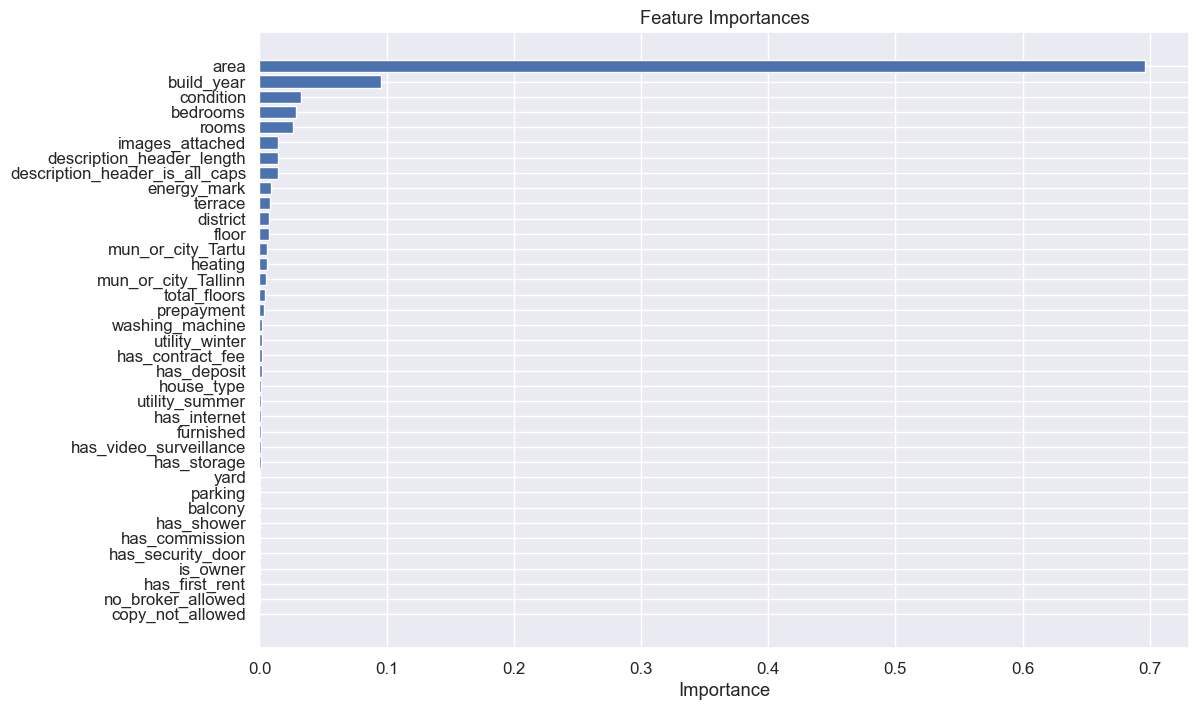

In [11]:
#using the model that worked the best
model = GradientBoostingRegressor(**best_gbm_params)
#this is done earlier and we now use it again for hyperparameters
model.fit(X_train, y_train)


feature_importances = model.feature_importances_
#model is trained so i can extract the importance of each feature in predicting price

#Create a dataframe to show them
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # The most important at the top
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.show()

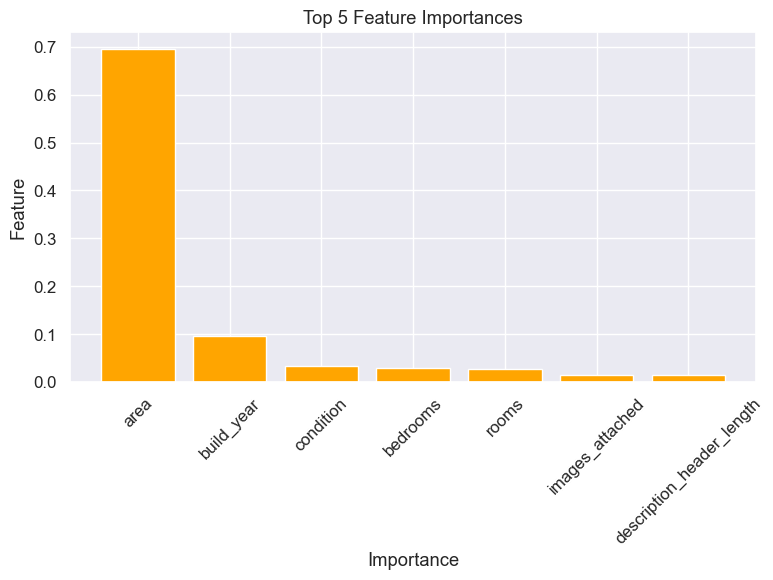

In [42]:
top_features = importance_df.head(7)
plt.figure(figsize=(8, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color='orange')
plt.title("Top 5 Feature Importances")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()